In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from scipy import stats
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mc_df = pd.merge(clinical_df, mouse_df, on='Mouse ID', how='outer')

# Display the data table for preview
mc_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tum_group = mc_df.groupby(['Drug','Timepoint'])

tumor_mean = tum_group['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
tumor_df = pd.DataFrame({'Tumor Volume (mm3)':tumor_mean}).reset_index()

# Preview DataFrame
#NOTE: delete .head() to see the entire output
tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
n = len(tum_group)
sqrt_n = np.sqrt(n)
tumor_std = tum_group['Tumor Volume (mm3)'].std()
#NOTE: I'm aware of the sem() function, but needed a refresher on formulas. 
tumor_se = tumor_std/sqrt_n
# Convert to DataFrame
tumor_se_df = pd.DataFrame({'Tumor Volume (mm3)':tumor_se}).reset_index()

# Preview DataFrame
#NOTE: delete .head() to see the entire output
tumor_se_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.224296
2,Capomulin,10,0.351342
3,Capomulin,15,0.410837
4,Capomulin,20,0.436292


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_pivot = pd.pivot_table(tumor_df, index=['Timepoint'],values=['Tumor Volume (mm3)'],columns=['Drug'])
# Preview that Reformatting worked
tumor_pivot.columns = tumor_pivot.columns.droplevel(0)
tumor_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
# Generate the Plot (with Error Bars)
tum_se_err = pd.pivot_table(tumor_se_df, index=['Timepoint'], values=['Tumor Volume (mm3)'], columns=['Drug'])
tum_se_err.columns = tum_se_err.columns.droplevel(0)
tum_se_select = tum_se_err[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

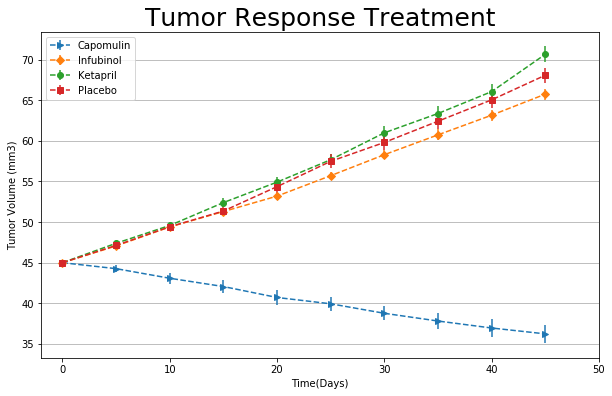

In [43]:
#plotting individual drugs with unique markers
tumor_select = tumor_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
tumor_select['Capomulin'].plot(kind="line", marker='>',figsize=(10,6),linestyle='dashed', yerr=(tum_se_select)*2)
tumor_select['Infubinol'].plot(kind="line", marker='D',figsize=(10,6),linestyle='dashed', yerr=(tum_se_select)*2)
tumor_select['Ketapril'].plot(kind="line", marker='o',figsize=(10,6),linestyle='dashed', yerr=(tum_se_select)*2)
tumor_select['Placebo'].plot(kind="line", marker='s',figsize=(10,6),linestyle='dashed', yerr=(tum_se_select)*2)
# Save the Figure

plt.title('Tumor Response Treatment',size=25)
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.xlim(-2,50)
plt.grid(axis='y')
plt.savefig('Images/tumor_chart.png')

#Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean = tum_group['Metastatic Sites'].mean()

# Convert to DataFrame
met_mean_df = pd.DataFrame({'Metastatic Sites':met_mean}).reset_index()
# Preview DataFrame
#NOTE Delete .head() to show the entire output
met_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_std = tum_group['Metastatic Sites'].std()
#NOTE: I'm aware of the sem() function, but needed a refresher on formulas. 
meta_se = meta_std/sqrt_n
# Convert to DataFrame
meta_se_sum = pd.DataFrame({'Metastatic Sites': meta_se}).reset_index()
# Preview DataFrame
#NOTE: Delete .head() to show the entire output
meta_se_sum.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.037417
2,Capomulin,10,0.062716
3,Capomulin,15,0.064690
4,Capomulin,20,0.077511


In [10]:
# Minor Data Munging to Re-Format the Data Frames
meta_pivot = pd.pivot_table(met_mean_df, index=['Timepoint'], values=['Metastatic Sites'], columns=['Drug'])
# Preview that Reformatting worked
meta_pivot.columns = meta_pivot.columns.droplevel(0)
meta_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# Generate the Plot (with Error Bars)
meta_se_err = pd.pivot_table(meta_se_sum, index=['Timepoint'], values=['Metastatic Sites'], columns=['Drug'])
meta_se_err.columns = meta_se_err.columns.droplevel(0)
meta_se_select = meta_se_err[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]


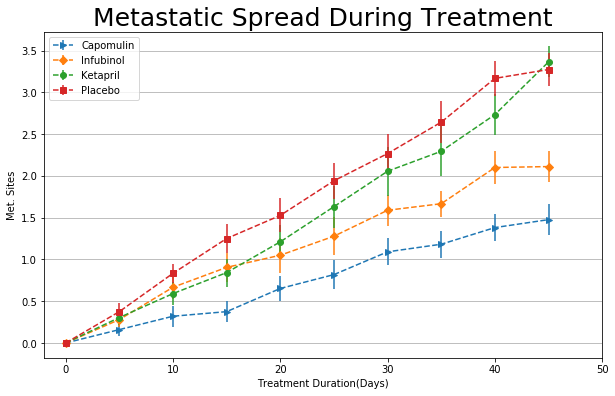

In [44]:
#plotting individual drugs with unique markers
meta_select = meta_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

tumor_select = tumor_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
meta_select['Capomulin'].plot(kind="line", marker='>',figsize=(10,6),linestyle='dashed', yerr=(meta_se_select)*2)
meta_select['Infubinol'].plot(kind="line", marker='D',figsize=(10,6),linestyle='dashed', yerr=(meta_se_select)*2)
meta_select['Ketapril'].plot(kind="line", marker='o',figsize=(10,6),linestyle='dashed', yerr=(meta_se_select)*2)
meta_select['Placebo'].plot(kind="line", marker='s',figsize=(10,6),linestyle='dashed', yerr=(meta_se_select)*2)

# Save the Figure
plt.title('Metastatic Spread During Treatment',size=25)
plt.legend()
plt.xlabel('Treatment Duration(Days)')
plt.ylabel('Met. Sites')
plt.xlim(-2,50)
plt.grid(axis='y')
plt.savefig('Images/meta_chart.png')
# Show the Figure
plt.show()

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = tum_group['Mouse ID'].count()
# Convert to DataFrame
mouse_count_df = pd.DataFrame({'Mouse Count':mouse_count}).reset_index() 
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mouse_pivot = pd.pivot_table(mouse_count_df, index=['Timepoint'], values=['Mouse Count'], columns=['Drug'])
mouse_pivot.columns = mouse_pivot.columns.droplevel(0)
# Preview the Data Frame
mouse_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


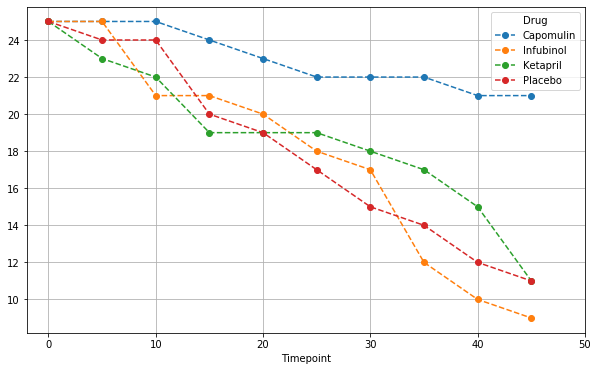

In [26]:
# Generate the Plot (Accounting for percentages)
mouse_select = mouse_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

mouse_plot = mouse_select.plot(kind='line',figsize=(10,6) ,marker='o',linestyle='dashed')
plt.grid()
plt.xlim(-2,50)
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [15]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)